# Import Library

In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Import Dataset

In [222]:
df = pd.read_csv('amazon.csv', encoding_errors='ignore', parse_dates=['date'])

# 1. Top 3 rows

In [223]:
df.head(3)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01


# 2. Last 3 rows

In [224]:
df.tail(3)

,year,state,month,number,date
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


# 3. Shape of Dataframe

In [225]:
print(f'Rows: {df.shape[0]}, Columns: {df.shape[1]}')

Rows: 6454, Columns: 5


# 4. Information about Dataframe

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


# 5. Check for duplicate data and drop them

In [227]:
df.duplicated().any()

True

In [228]:
df.duplicated().sum()

32

In [229]:
df = df.drop_duplicates()

In [230]:
df.shape

(6422, 5)

# 6. Check null values

In [231]:
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

# 7. Statistics about Dataframe

In [232]:
df.describe()

,year,number,date
count,6422.000000,6422.000000,6422
mean,2007.490969,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,0.000000,1998-01-01 00:00:00
25%,2003.000000,3.000000,2003-01-01 00:00:00
50%,2007.000000,24.497000,2007-01-01 00:00:00
75%,2012.000000,114.000000,2012-01-01 00:00:00
max,2017.000000,998.000000,2017-01-01 00:00:00
std,5.731806,191.142482,NaN


In [233]:
df.describe(include='all')

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Agosto,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


# 8. Rename Month Names to English

In [234]:
df['month'].unique()

array(['Janeiro', 'Fevereiro', 'Maro', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [235]:
df['month_english'] = df['month'].map({
    'Janeiro':'jan', 
    'Fevereiro':'feb', 
    'Maro':'march', 
    'Abril':'april', 
    'Maio':'may', 
    'Junho':'june', 
    'Julho':'july',
    'Agosto':'august', 
    'Setembro':'sep', 
    'Outubro':'oct', 
    'Novembro':'nov', 
    'Dezembro':'dec'
})

# 9. Total number of fires registered

In [236]:
df.shape[0]

6422

# 10. In which month maximum number of forest fires were reported?

In [237]:
month_fires = df.groupby('month_english')['number'].sum().sort_values(ascending=False).reset_index()
month_fires

,month_english,number
0,july,92319.113
1,oct,88681.579
2,august,88050.435
3,nov,85508.054
4,sep,58578.305
5,dec,57535.480
6,june,55997.675
7,jan,47681.844
8,may,34725.363
9,feb,30839.050


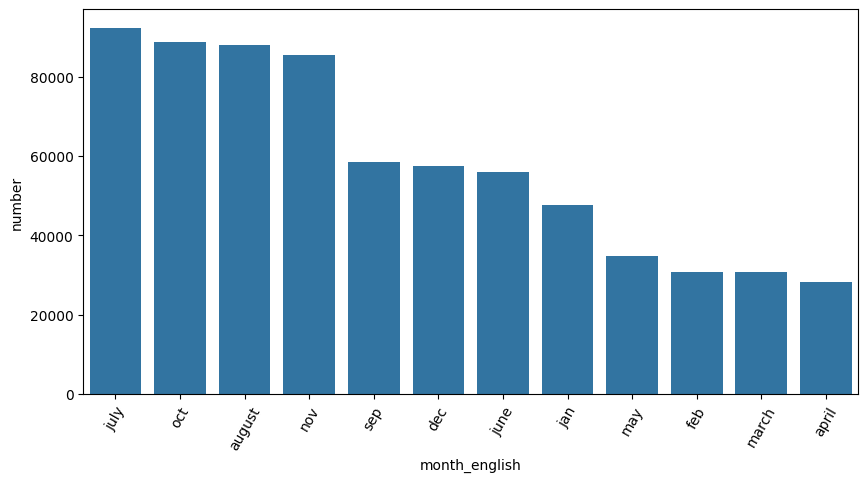

In [238]:
plt.figure(figsize=(10, 5))
sns.barplot(x='month_english', y='number', data=month_fires)
plt.xticks(rotation=60)
plt.show()

# 11. In which year, maximum number of forest fires were reported?

In [239]:
year_fires = df.groupby('year')['number'].sum().sort_values(ascending=False).reset_index()
year_fires

,year,number
0,2003,42760.674
1,2016,42212.229
2,2015,41208.292
3,2012,40084.860
4,2014,39621.183
5,2009,39116.178
6,2004,38450.163
7,2002,37390.600
8,2010,37037.449
9,2017,36619.624


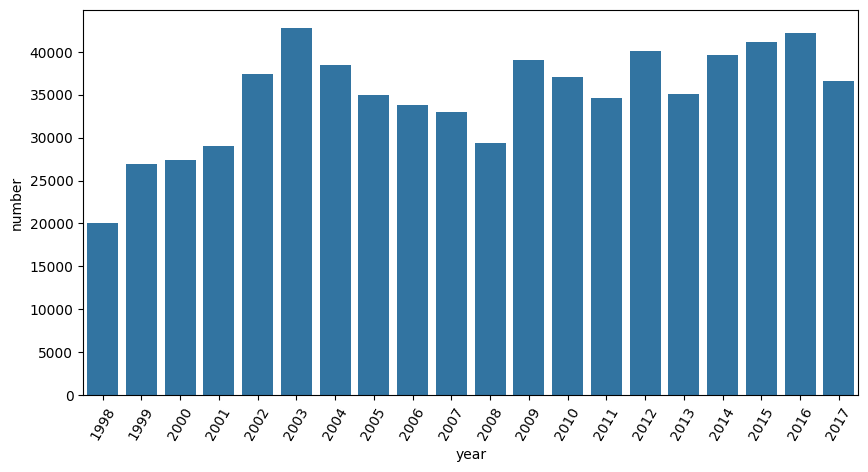

In [240]:
plt.figure(figsize=(10, 5))
sns.barplot(x='year', y='number', data=year_fires)
plt.xticks(rotation=60)
plt.show()

# 12. In which state maximum number of forest fires were reported?

In [241]:
state_fires = df.groupby('state')['number'].sum().sort_values(ascending=False).reset_index()
state_fires

,state,number
0,Mato Grosso,96246.028
1,Paraiba,52426.918
2,Sao Paulo,51121.198
3,Rio,45094.865
4,Bahia,44746.226
5,Piau,37803.747
6,Goias,37695.520
7,Minas Gerais,37475.258
8,Tocantins,33707.885
9,Amazonas,30650.129


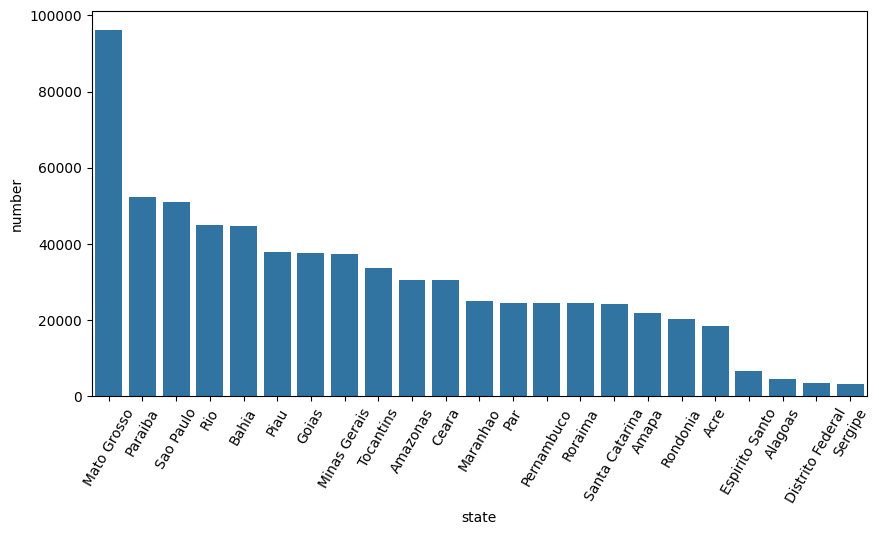

In [242]:
plt.figure(figsize=(10, 5))
sns.barplot(x='state', y='number', data=state_fires)
plt.xticks(rotation=60)
plt.show()

# 13. Find total number of fires that were reported in Amazonas

In [243]:
df[df['state']=='Amazonas']['number'].sum()

30650.129

# 14. Display number of fires that were reported in Amazonas (Year-Wise)

In [244]:
amazonas = df[df['state']=='Amazonas'].groupby('year')['number'].sum().reset_index()
amazonas

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


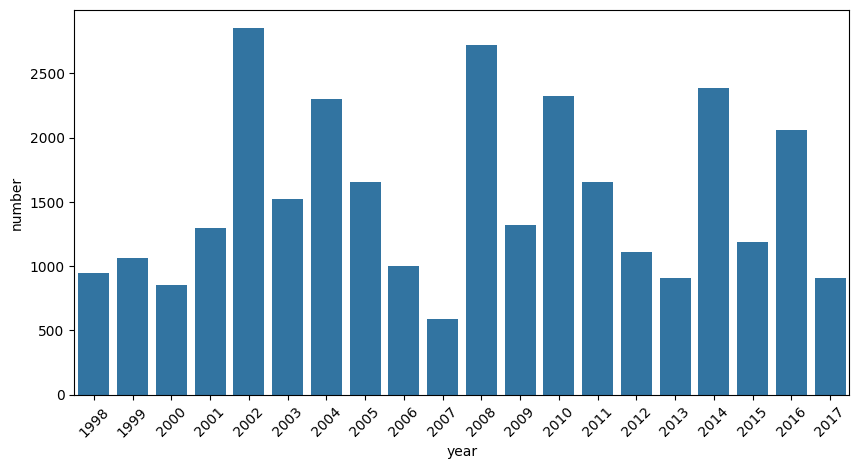

In [245]:
plt.figure(figsize=(10, 5))
sns.barplot(x='year', y='number', data=amazonas)
plt.xticks(rotation=45)
plt.show()

# 15. Display number of fires that were reported in Amazonas (Day-wise)

In [246]:
day = df[df['state']=='Amazonas'].groupby(df['date'].dt.dayofweek)['number'].sum()
day

date
0    1886.601
1    6474.217
2    3910.177
3    5754.802
4    5446.480
5    4162.666
6    3015.186
Name: number, dtype: float64

In [247]:
day.index = [calendar.day_name[x] for x in range(0, 7)]
day = day.reset_index()
day

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


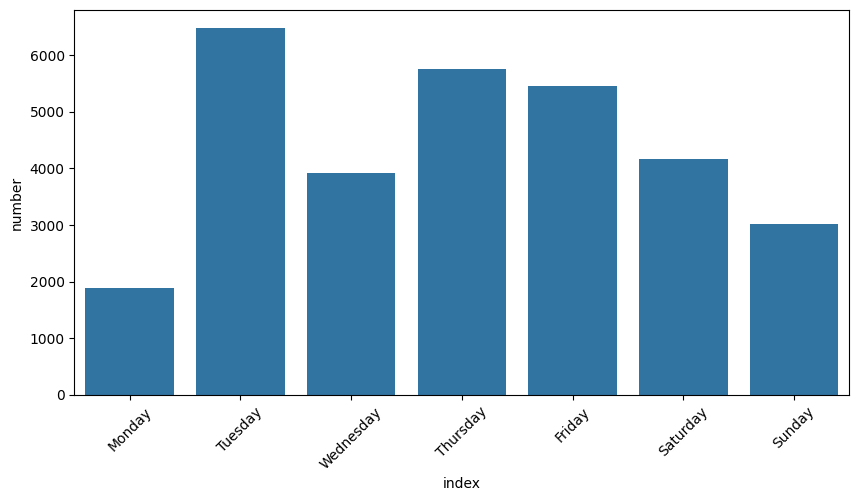

In [248]:
plt.figure(figsize=(10, 5))
sns.barplot(x='index', y='number', data=day)
plt.xticks(rotation=45)
plt.show()

# 16. Find total number of fires that were reported in 2015 and Visualize Data based on each 'month'.

In [249]:
year = df[df['year']==2015].groupby('month_english')['number'].sum().reset_index()
year

,month_english,number
0,april,2573.000
1,august,4363.125
2,dec,4088.522
3,feb,2309.000
4,jan,4635.000
5,july,4364.392
6,june,3260.552
7,march,2202.000
8,may,2384.000
9,nov,4034.518


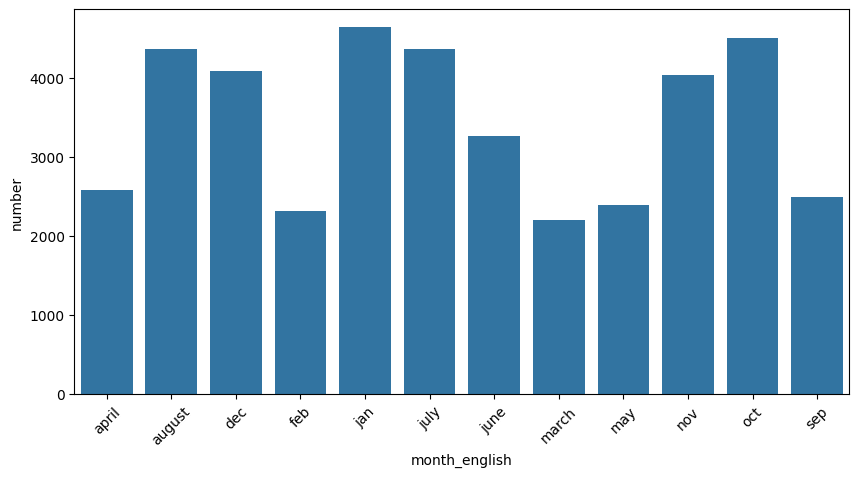

In [250]:
plt.figure(figsize=(10, 5))
sns.barplot(x='month_english', y='number', data=year)
plt.xticks(rotation=45)
plt.show()

# 17. Find average number of fires that were reported from highest to lowest (state-wise)

In [251]:
state = df.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()
state

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


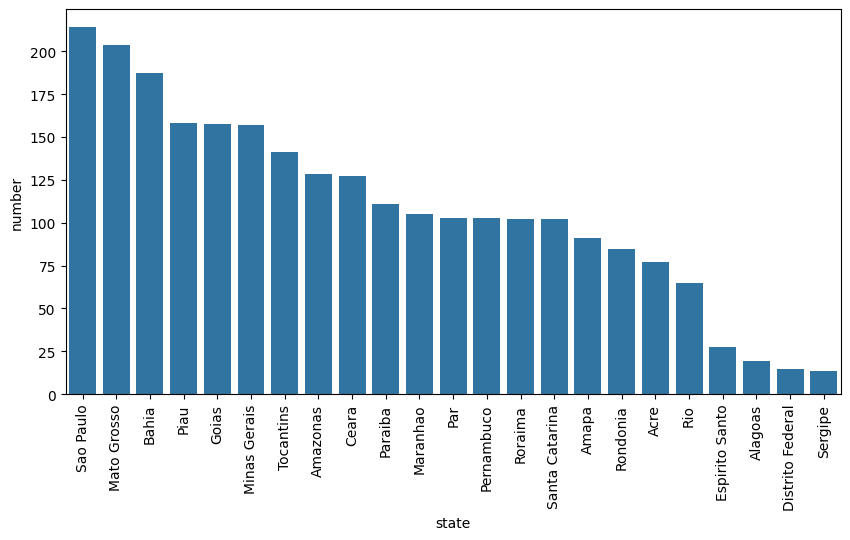

In [252]:
plt.figure(figsize=(10, 5))
sns.barplot(x='state', y='number', data=state)
plt.xticks(rotation=90)
plt.show()

# 18. Find the state names where fires were reported in 'dec' month

In [253]:
df[df['month_english']=='dec']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Par', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)